<a href="https://colab.research.google.com/github/JainilThakkar/CMP7239/blob/main/Jainil_Thakkar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***# Mounts your Google Drive to the Colab environment***

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***Providing the path for the Dataset***

In [40]:
import shutil
import os

source_path = "/content/drive/MyDrive/Cybersecurity Intrusion Detection.csv"
destination_path = "Cybersecurity Intrusion Detection.csv"

try:
    shutil.copyfile(source_path, destination_path)
    print(f"File copied successfully to {destination_path}")
except FileNotFoundError:
    print(f"Error: The source file was not found at {source_path}")
except Exception as e:
    print(f"An error occurred: {e}")

File copied successfully to Cybersecurity Intrusion Detection.csv


***Importing the Numpy and Pandas library***

In [42]:
import numpy as np
import pandas as pd

In [43]:
data=pd.read_csv("/content/Cybersecurity Intrusion Detection.csv")

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


***# Creates a pair plot of the dataset to visualize pairwise relationships between features,***

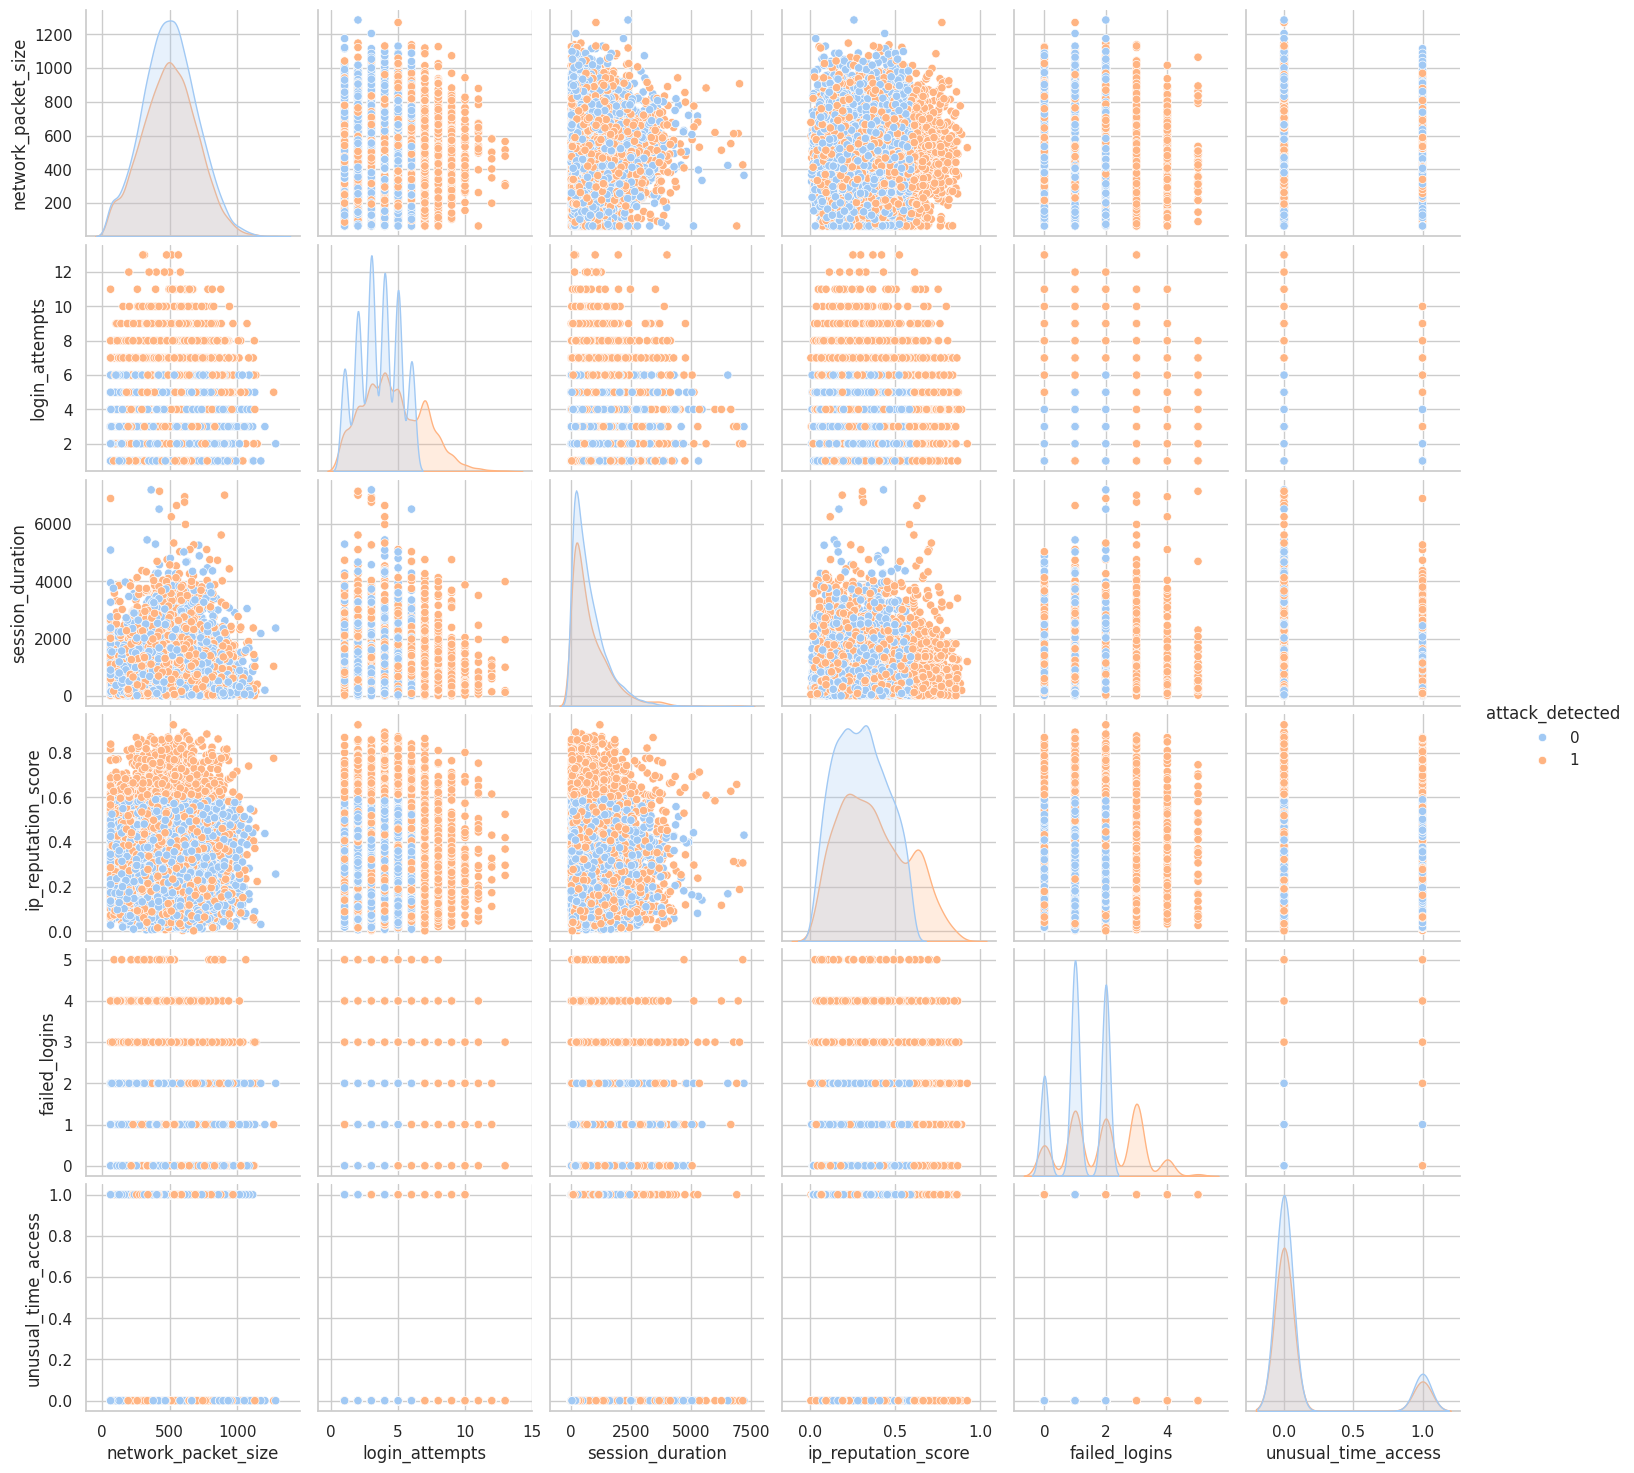

In [45]:
import seaborn as sns
sns.pairplot(data,hue="attack_detected", palette="pastel")

In [46]:
data=data.drop(["session_id"],axis=1)

***## 1. Implementation of KNN with and without feacture***

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2

# Load and Preprocess Dataset
df = pd.read_csv('Cybersecurity Intrusion Detection.csv')
df = df.drop('session_id', axis=1)
df_encoded = pd.get_dummies(df, columns=['protocol_type', 'encryption_used', 'browser_type'], drop_first=True)

# Separate features and target
X = df_encoded.drop('attack_detected', axis=1)
y = df_encoded['attack_detected']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



#KNN WITHOUT Feature Selection

# Scale all features
scaler_all = StandardScaler()
X_train_scaled_all = scaler_all.fit_transform(X_train)
X_test_scaled_all = scaler_all.transform(X_test)

# Train and evaluate KNN
knn_all = KNeighborsClassifier(n_neighbors=5)
knn_all.fit(X_train_scaled_all, y_train)
y_pred_knn_all = knn_all.predict(X_test_scaled_all)

print("\n---- KNN WITHOUT Feature Selection ----")
print(f"F1 Score for the Intrusion Detection Dataset: {f1_score(y_test, y_pred_knn_all):.4f}")
print("Classification Report of the Dataset:")
print(classification_report(y_test, y_pred_knn_all))




#KNN WITHOUT Feature Selection

# Select top k features
k_best_count = 8
selector = SelectKBest(score_func=chi2, k=k_best_count)
X_train_kbest = selector.fit_transform(X_train, y_train)
X_test_kbest = selector.transform(X_test)

# Show selected feature names
selected_feature_names = X.columns[selector.get_support()]
print(f"\nSelected Top {k_best_count} Features: {list(selected_feature_names)}")

# Scale selected features
scaler_kbest = StandardScaler()
X_train_kbest_scaled = scaler_kbest.fit_transform(X_train_kbest)
X_test_kbest_scaled = scaler_kbest.transform(X_test_kbest)

# Train and evaluate KNN on selected features
knn_kbest = KNeighborsClassifier(n_neighbors=5)
knn_kbest.fit(X_train_kbest_scaled, y_train)
y_pred_knn_kbest = knn_kbest.predict(X_test_kbest_scaled)

print("\n=== KNN WITH Feature Selection ===")
print(f"F1 Score for the Intrusion Detection Dataset: {f1_score(y_test, y_pred_knn_kbest):.4f}")
print("Classification Report of the Dataset:")
print(classification_report(y_test, y_pred_knn_kbest))


---- KNN WITHOUT Feature Selection ----
F1 Score for the Intrusion Detection Dataset: 0.7296
Classification Report of the Dataset:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83      1582
           1       0.86      0.63      0.73      1280

    accuracy                           0.79      2862
   macro avg       0.81      0.78      0.78      2862
weighted avg       0.80      0.79      0.78      2862


Selected Top 8 Features: ['network_packet_size', 'login_attempts', 'session_duration', 'ip_reputation_score', 'failed_logins', 'browser_type_Edge', 'browser_type_Firefox', 'browser_type_Unknown']

=== KNN WITH Feature Selection ===
F1 Score for the Intrusion Detection Dataset: 0.7988
Classification Report of the Dataset:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1582
           1       0.91      0.71      0.80      1280

    accuracy                           0.84      2862

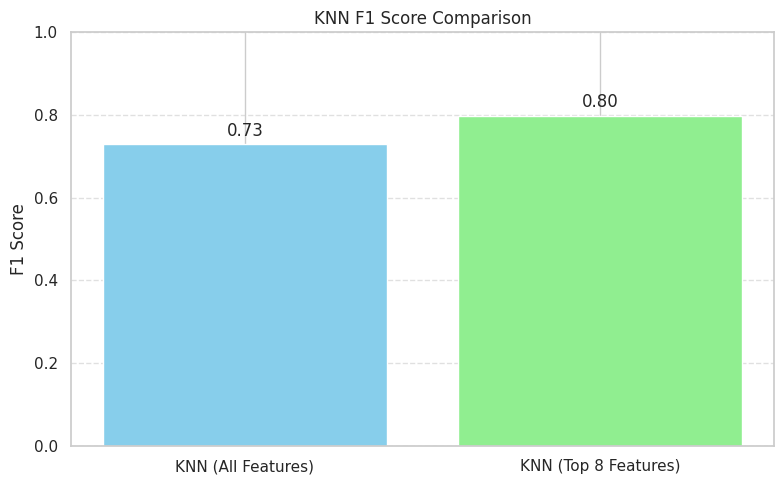

In [48]:
import matplotlib.pyplot as plt

# Store the F1 scores
f1_scores = {
    'KNN (All Features)': f1_score(y_test, y_pred_knn_all),
    f'KNN (Top {k_best_count} Features)': f1_score(y_test, y_pred_knn_kbest)
}

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(f1_scores.keys(), f1_scores.values(), color=['skyblue', 'lightgreen'])
plt.title('KNN F1 Score Comparison')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate bars with F1 score values
for i, (label, score) in enumerate(f1_scores.items()):
    plt.text(i, score + 0.02, f"{score:.2f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

***The ROC - AUC Curve for the KNN***

ROC–AUC Score (All Features): 0.8258
ROC–AUC Score (Top 8 Features): 0.8528


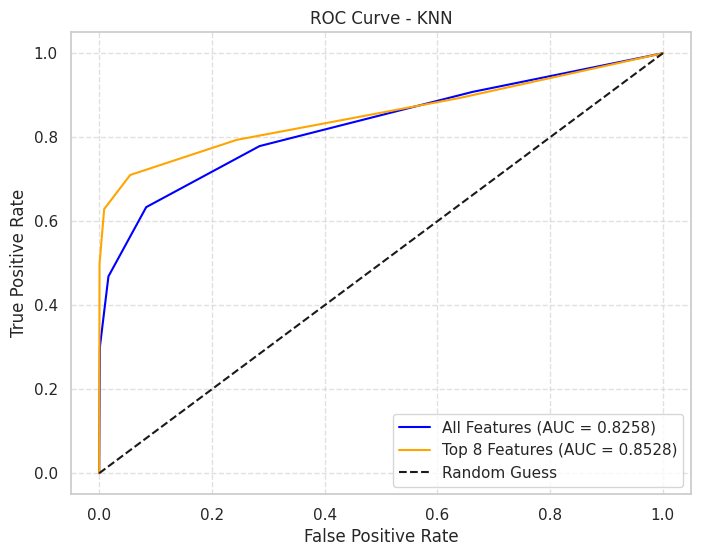

In [49]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# ROC–AUC score (Without feature selection)
y_prob_knn_all = knn_all.predict_proba(X_test_scaled_all)[:, 1]
roc_auc_all = roc_auc_score(y_test, y_prob_knn_all)

# ROC–AUC score (With feature selection)
y_prob_knn_kbest = knn_kbest.predict_proba(X_test_kbest_scaled)[:, 1]
roc_auc_kbest = roc_auc_score(y_test, y_prob_knn_kbest)

print(f"ROC–AUC Score (All Features): {roc_auc_all:.4f}")
print(f"ROC–AUC Score (Top {k_best_count} Features): {roc_auc_kbest:.4f}")

# ROC curve plot
fpr_all, tpr_all, _ = roc_curve(y_test, y_prob_knn_all)
fpr_kbest, tpr_kbest, _ = roc_curve(y_test, y_prob_knn_kbest)

plt.figure(figsize=(8, 6))
plt.plot(fpr_all, tpr_all, label=f"All Features (AUC = {roc_auc_all:.4f})", color='blue')
plt.plot(fpr_kbest, tpr_kbest, label=f"Top {k_best_count} Features (AUC = {roc_auc_kbest:.4f})", color='orange')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


***## 2. Implementation of Decision Tree with and without feacture selection***

Dataset shape: (9537, 11)
 Decision Tree WITHOUT Feature Selection
F1 Score for the Intrusion Detection Dataset: 0.8153352582441766
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1260
           1       0.79      0.80      0.79      1012

    accuracy                           0.82      2272
   macro avg       0.81      0.81      0.81      2272
weighted avg       0.82      0.82      0.82      2272


 Decision Tree WITH Feature Selection (Top 9 Features)
F1 Score for the Intrusion Detection Dataset: 0.8205680506704429
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1260
           1       0.79      0.81      0.80      1012

    accuracy                           0.82      2272
   macro avg       0.82      0.82      0.82      2272
weighted avg       0.82      0.82      0.82      2272



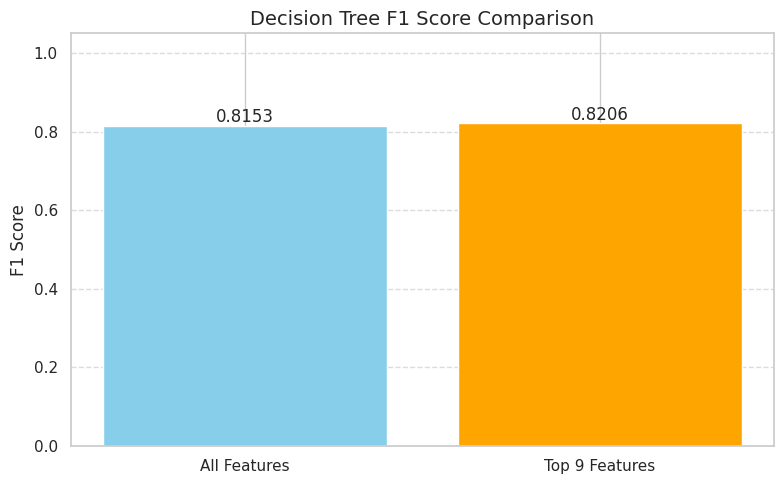

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.feature_selection import SelectKBest, chi2

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv('Cybersecurity Intrusion Detection.csv')
print("Dataset shape:", df.shape)
df.head()

# Step 3: Preprocessing
df = df.dropna()

# Encode categorical columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Separate features and label
X = df.drop('attack_detected', axis=1)
y = df['attack_detected']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model without feature selection
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt_full = DecisionTreeClassifier(random_state=42)
dt_full.fit(X_train_scaled, y_train)

y_pred_full = dt_full.predict(X_test_scaled)

# F1 score without feature selection
f1_full = f1_score(y_test, y_pred_full, average='weighted')
print(" Decision Tree WITHOUT Feature Selection")
print("F1 Score for the Intrusion Detection Dataset:", f1_full)
print(classification_report(y_test, y_pred_full))

# Model WITH Feature Selection
k = 9
selector = SelectKBest(score_func=chi2, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

scaler_selected = StandardScaler()
X_train_selected_scaled = scaler_selected.fit_transform(X_train_selected)
X_test_selected_scaled = scaler_selected.transform(X_test_selected)

dt_selected = DecisionTreeClassifier(random_state=42)
dt_selected.fit(X_train_selected_scaled, y_train)

y_pred_selected = dt_selected.predict(X_test_selected_scaled)

# F1 score with feature selection
f1_kbest = f1_score(y_test, y_pred_selected, average='weighted')
print(f"\n Decision Tree WITH Feature Selection (Top {k} Features)")
print("F1 Score for the Intrusion Detection Dataset:", f1_kbest)
print(classification_report(y_test, y_pred_selected))

# Plotting
methods = ['All Features', f'Top {k} Features']
f1_scores = [f1_full, f1_kbest]

plt.figure(figsize=(8, 5))
bars = plt.bar(methods, f1_scores, color=['skyblue', 'orange'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.01, f"{height:.4f}", ha='center', fontsize=12)

plt.title('Decision Tree F1 Score Comparison', fontsize=14)
plt.ylabel('F1 Score', fontsize=12)
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


***The ROC - AUC Curve for the Decision Tree***

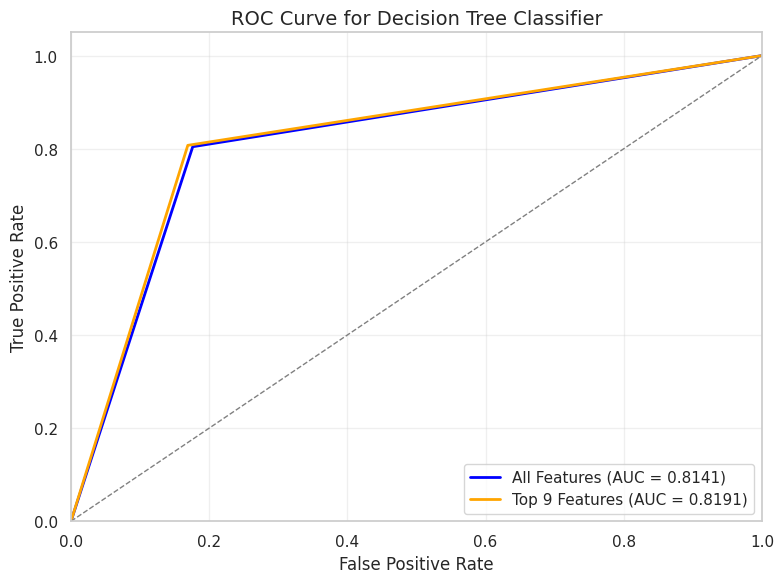

In [51]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Predict probabilities for ROC curve
y_prob_full = dt_full.predict_proba(X_test_scaled)[:, 1]
y_prob_selected = dt_selected.predict_proba(X_test_selected_scaled)[:, 1]

# Compute ROC curve and AUC for full features
fpr_full, tpr_full, _ = roc_curve(y_test, y_prob_full)
roc_auc_full = auc(fpr_full, tpr_full)

# Compute ROC curve and AUC for selected features
fpr_selected, tpr_selected, _ = roc_curve(y_test, y_prob_selected)
roc_auc_selected = auc(fpr_selected, tpr_selected)

# Plot ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr_full, tpr_full, color='blue', lw=2, label=f'All Features (AUC = {roc_auc_full:.4f})')
plt.plot(fpr_selected, tpr_selected, color='orange', lw=2, label=f'Top {k} Features (AUC = {roc_auc_selected:.4f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve for Decision Tree Classifier', fontsize=14)
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


***## 2. Implementation of Support vector machine with and without feacture selection***


--- SVM WITHOUT Feature Selection ---
F1 Score (All Features): 0.8274
Classification Report (All Features):
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1582
           1       0.94      0.74      0.83      1280

    accuracy                           0.86      2862
   macro avg       0.88      0.85      0.86      2862
weighted avg       0.88      0.86      0.86      2862


Top 5 Selected Features: ['login_attempts', 'session_duration', 'ip_reputation_score', 'failed_logins', 'browser_type_Unknown']

--- SVM WITH Feature Selection ---
F1 Score (Top 5 Features): 0.8455
Classification Report (Top Features):
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1582
           1       0.99      0.74      0.85      1280

    accuracy                           0.88      2862
   macro avg       0.91      0.87      0.87      2862
weighted avg       0.90      0.88      0.88      2862



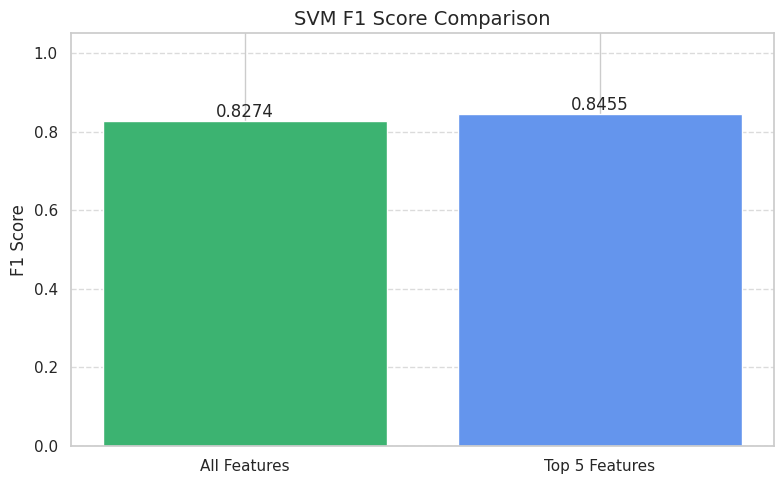

In [52]:
# Required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Cybersecurity Intrusion Detection.csv')

# Drop ID column
df.drop('session_id', axis=1, inplace=True)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['protocol_type', 'encryption_used', 'browser_type'], drop_first=True)

# Separate features and target
X = df_encoded.drop('attack_detected', axis=1)
y = df_encoded['attack_detected']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# SVM WITHOUT Feature Selection

# Scale features (SVM is scale-sensitive)
scaler_full = StandardScaler()
X_train_scaled = scaler_full.fit_transform(X_train)
X_test_scaled = scaler_full.transform(X_test)

# Train SVM model
svm_full = SVC(kernel='rbf', random_state=42)
svm_full.fit(X_train_scaled, y_train)
y_pred_full = svm_full.predict(X_test_scaled)

# Evaluate
f1_full = f1_score(y_test, y_pred_full)
print("\n--- SVM WITHOUT Feature Selection ---")
print(f"F1 Score (All Features): {f1_full:.4f}")
print("Classification Report (All Features):")
print(classification_report(y_test, y_pred_full))


# SVM WITH Feature Selection

k = 5
selector = SelectKBest(score_func=chi2, k=k)
X_train_kbest = selector.fit_transform(X_train, y_train)
X_test_kbest = selector.transform(X_test)

selected_features = X.columns[selector.get_support()]
print(f"\nTop {k} Selected Features: {list(selected_features)}")

# Scale selected features
scaler_kbest = StandardScaler()
X_train_kbest_scaled = scaler_kbest.fit_transform(X_train_kbest)
X_test_kbest_scaled = scaler_kbest.transform(X_test_kbest)

# Train SVM model
svm_kbest = SVC(kernel='rbf', random_state=42)
svm_kbest.fit(X_train_kbest_scaled, y_train)
y_pred_kbest = svm_kbest.predict(X_test_kbest_scaled)

# Evaluate
f1_kbest = f1_score(y_test, y_pred_kbest)
print("\n--- SVM WITH Feature Selection ---")
print(f"F1 Score (Top {k} Features): {f1_kbest:.4f}")
print("Classification Report (Top Features):")
print(classification_report(y_test, y_pred_kbest))


# Plot F1 Score Comparison

methods = ['All Features', f'Top {k} Features']
f1_scores = [f1_full, f1_kbest]

plt.figure(figsize=(8, 5))
bars = plt.bar(methods, f1_scores, color=['mediumseagreen', 'cornflowerblue'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.4f}', ha='center', fontsize=12)

plt.title('SVM F1 Score Comparison', fontsize=14)
plt.ylabel('F1 Score', fontsize=12)
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

***The ROC - AUC Curve for the SVM***

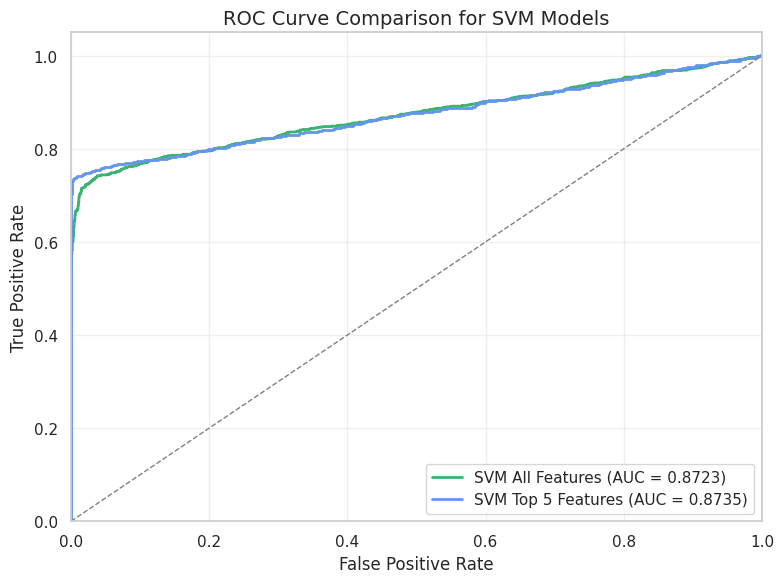

In [53]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Enable probability=True for SVC to get probability estimates
# Retrain SVM WITHOUT feature selection with probability=True
svm_full_prob = SVC(kernel='rbf', random_state=42, probability=True)
svm_full_prob.fit(X_train_scaled, y_train)
y_score_full = svm_full_prob.predict_proba(X_test_scaled)[:, 1]

# ROC AUC for full features
roc_auc_full = roc_auc_score(y_test, y_score_full)
fpr_full, tpr_full, _ = roc_curve(y_test, y_score_full)

# Retrain SVM WITH feature selection with probability=True
svm_kbest_prob = SVC(kernel='rbf', random_state=42, probability=True)
svm_kbest_prob.fit(X_train_kbest_scaled, y_train)
y_score_kbest = svm_kbest_prob.predict_proba(X_test_kbest_scaled)[:, 1]

# ROC AUC for selected features
roc_auc_kbest = roc_auc_score(y_test, y_score_kbest)
fpr_kbest, tpr_kbest, _ = roc_curve(y_test, y_score_kbest)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_full, tpr_full, color='mediumseagreen', lw=2, label=f'SVM All Features (AUC = {roc_auc_full:.4f})')
plt.plot(fpr_kbest, tpr_kbest, color='cornflowerblue', lw=2, label=f'SVM Top {k} Features (AUC = {roc_auc_kbest:.4f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Comparison for SVM Models', fontsize=14)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
